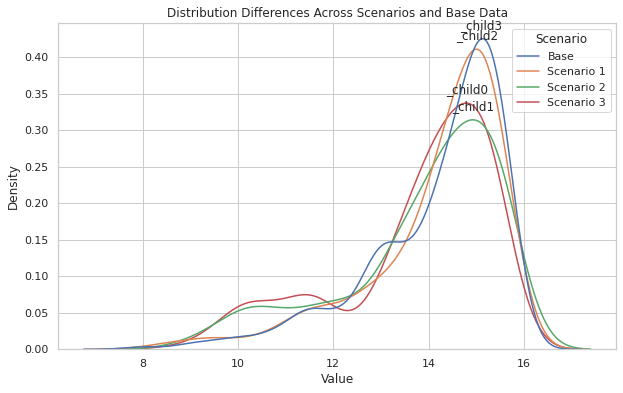

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot the distribution difference among multiple scenarios and a base data
def plot_distribution_difference(scenario_files, base_file):
    sns.set(style="whitegrid")
    
    # Read the base data
    base_data = pd.read_csv(base_file, header=None, names=['Value'])
    base_data['Scenario'] = 'Base'
    
    all_data = base_data
    
    # Read the scenario data and append to all_data
    for i, file in enumerate(scenario_files):
        scenario_data = pd.read_csv(file, header=None, names=['Value'])
        scenario_data['Scenario'] = f'Scenario {i + 1}'
        all_data = pd.concat([all_data, scenario_data])
    
    # Create the plot
    plt.figure(figsize=(10, 5))
    ax = sns.kdeplot(data=all_data, x='Value', hue='Scenario', common_norm=False)
    
    # Annotate the lines
    lines = ax.lines  # Get the Line2D objects from the axes
    for i, line in enumerate(lines):
        y = line.get_ydata()  # y-data of the line
        x = line.get_xdata()  # x-data of the line
        label = line.get_label()  # label of the line (Scenario)
        max_y = max(y)
        max_x = x[y.argmax()]  # x value corresponding to the maximum y value
        plt.annotate(label, xy=(max_x, max_y), textcoords="offset points", xytext=(0, 10), ha='center')
    
    plt.title('Distribution Differences Across Scenarios and Base Data')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

# Due to the absence of actual CSV files, this function won't execute here.
# However, you can run it in your local setup like this:
PREPATH = "/home/wangqihang/MyContinualLearning/store/datasets/QoT/"

scenario_files = [PREPATH+'y_test_1_1.csv', PREPATH+'y_test_2_1.csv', PREPATH+'y_test_3_1.csv']
base_file = PREPATH+'y_train_1.csv'
plot_distribution_difference(scenario_files, base_file)



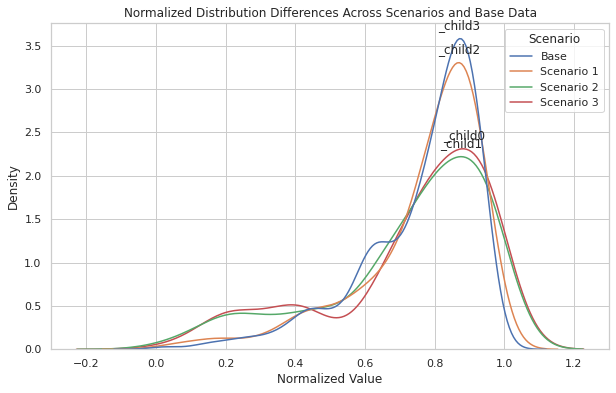

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Function to normalize data from CSV files and return as DataFrame
def normalize_csv_files(files):
    normalized_data_list = []
    scaler = MinMaxScaler()
    
    for i, file in enumerate(files):
        # Read the CSV file
        data = pd.read_csv(file, header=None, names=['Value'])
        
        # Normalize the data
        data_normalized = scaler.fit_transform(data[['Value']])
        data['Normalized_Value'] = data_normalized
        
        # Add a scenario label for plotting
        if i == 0:
            data['Scenario'] = 'Base'
        else:
            data['Scenario'] = f'Scenario {i}'
        
        normalized_data_list.append(data)
    
    # Combine all the data into a single DataFrame
    all_data = pd.concat(normalized_data_list)
    
    return all_data

# Function to plot normalized data with annotations
def plot_normalized_data(normalized_data):
    plt.figure(figsize=(10, 6))
    ax = sns.kdeplot(data=normalized_data, x='Normalized_Value', hue='Scenario', common_norm=False)
    
    # Annotate the lines
    lines = ax.lines
    for i, line in enumerate(lines):
        y = line.get_ydata()
        x = line.get_xdata()
        label = line.get_label()
        max_y = max(y)
        max_x = x[y.argmax()]
        plt.annotate(label, xy=(max_x, max_y), textcoords="offset points", xytext=(0, 10), ha='center')
    
    plt.title('Normalized Distribution Differences Across Scenarios and Base Data')
    plt.xlabel('Normalized Value')
    plt.ylabel('Density')
    plt.show()

# Usage (this will not execute here due to absence of actual CSV files)
files = [PREPATH+'y_train_1.csv', PREPATH+'y_test_1_1.csv', PREPATH+'y_test_2_1.csv', PREPATH+'y_test_3_1.csv']

normalized_data = normalize_csv_files(files)
plot_normalized_data(normalized_data)



In [14]:
# Example function to save the plot as a high-resolution image without any casing
def save_plot_high_res(ax, filename):
    plt.tight_layout()
    ax.get_figure().savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0)

# Example usage (this won't execute here due to the absence of a plot)
# ax = sns.kdeplot(...)  # Your plotting code here
# save_plot_high_res(ax, 'high_res_plot.png')



/tmp/ipykernel_1037401/2070156810.py:28: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.kdeplot(data=all_data, x='Value', hue='Scenario', palette=color_palette, common_norm=False)


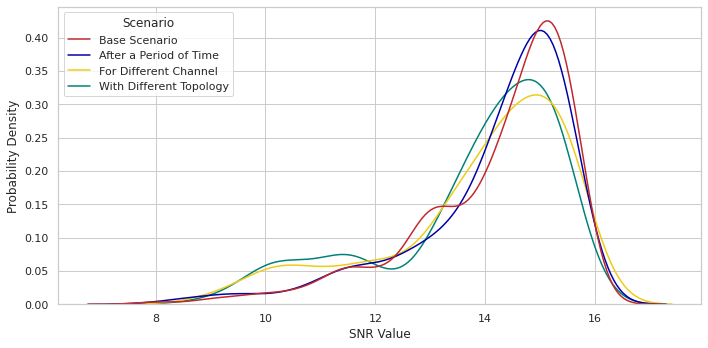

In [15]:
# Function to plot data with academic-friendly colors for distinguishability
def plot_academic_distribution_difference(scenario_files, base_file):
    sns.set(style="whitegrid")
    
    # Academic-friendly color palette
    color_palette = ['#c1272d', '#0000a7', '#eecc16', '#008176', '#b3b3b3']
    
    # Read the base data
    base_data = pd.read_csv(base_file, header=None, names=['Value'])
    base_data['Scenario'] = 'Base Scenario'
    
    all_data = base_data
    
    # Read the scenario data and append to all_data
    for i, file in enumerate(scenario_files):
        scenario_data = pd.read_csv(file, header=None, names=['Value'])
        if i == 0:
            scenario_data['Scenario'] = f'After a Period of Time'
        elif i == 1:
            scenario_data['Scenario'] = f'For Different Channel'
        elif i == 2:
            scenario_data['Scenario'] = f'With Different Topology'
        
        all_data = pd.concat([all_data, scenario_data])
    
    # Create the plot
    plt.figure(figsize=(10, 5))
    ax = sns.kdeplot(data=all_data, x='Value', hue='Scenario', palette=color_palette, common_norm=False)
    save_plot_high_res(ax, "/home/wangqihang/MyContinualLearning/store/plots/output3.png")
    # Annotate the lines
    lines = ax.lines  # Get the Line2D objects from the axes
    for i, line in enumerate(lines):
        y = line.get_ydata()  # y-data of the line
        x = line.get_xdata()  # x-data of the line

    
    #plt.title('Distribution Differences with Academic-Friendly Colors')
    plt.xlabel('SNR Value')
    plt.ylabel('Probability Density')
    plt.show()

# Example usage (the function will not execute here due to the absence of actual CSV files)

plot_academic_distribution_difference(scenario_files, base_file)


